# Bigmart Sales Dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("bigmart.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

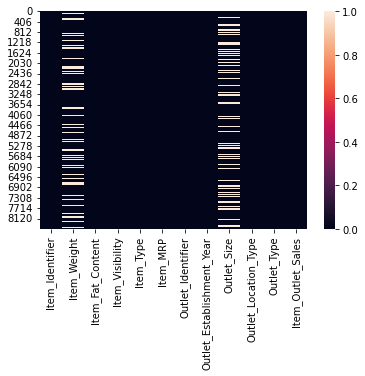

In [6]:
sns.heatmap(df.isnull()) # There are some missing values in Item_Weight and Outlet_Size

In [ ]:
# Filling the missing values

In [7]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0], inplace=True)

In [ ]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)

In [8]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [9]:
df["Item_Identifier"].nunique() # There are 1559 unique Item_Identifier code

1559

In [41]:
df["Item_Type"].unique() # Item types

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Univariate Analysis**

C:\Users\SOUGOTO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

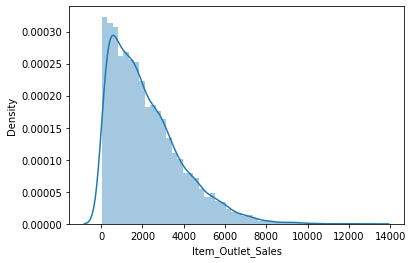

In [24]:
sns.distplot(df["Item_Outlet_Sales"], kde=True)

In [ ]:
# Here We can see the Outlet sale graph is normally distributed with right skewness
# Most products that were saled, were in sale range 0 to 2000

<AxesSubplot:ylabel='Item_Weight'>

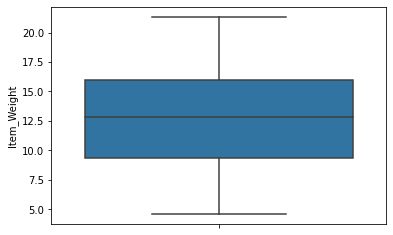

In [19]:
sns.boxplot(y="Item_Weight", data=df)

In [ ]:
# We can see there are no outliers
# Maximum weight arround 21 or 22
# Minimum weight arround 4
# 25 percentile --> arround 8
# 50 percentile --> arround 13
# 75 percentile --> arround 15

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

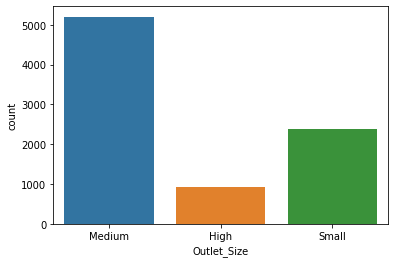

In [20]:
sns.countplot(x="Outlet_Size", data=df)

In [ ]:
# Most of the Outlet (store) having medium size

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

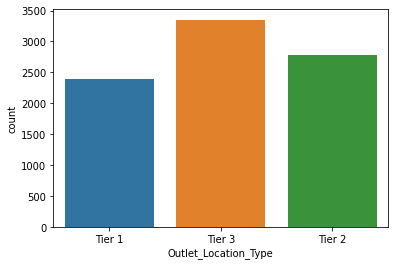

In [22]:
sns.countplot(x="Outlet_Location_Type", data=df)

In [ ]:
# Most of the Outlet are in Tier 3
# Tier 2 is second most after Tier 3

<AxesSubplot:xlabel='count', ylabel='Outlet_Type'>

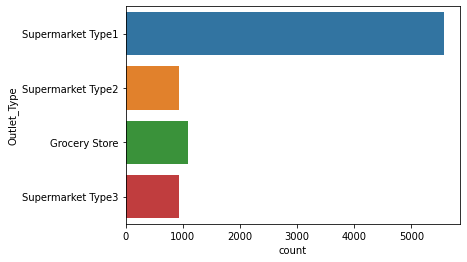

In [37]:
sns.countplot(y="Outlet_Type", data=df)

In [ ]:
# Most of the Outlets are Supermarkets of type 1
# Second most Outlets are Grocery Store

**Bivariate Analysis**

In [27]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

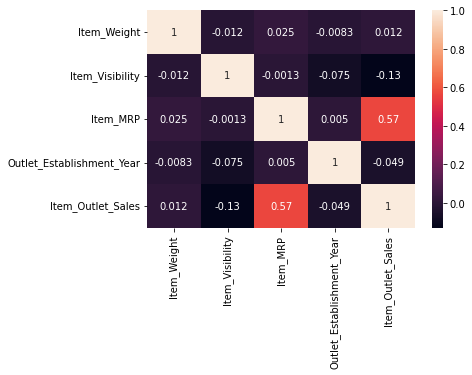

In [29]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

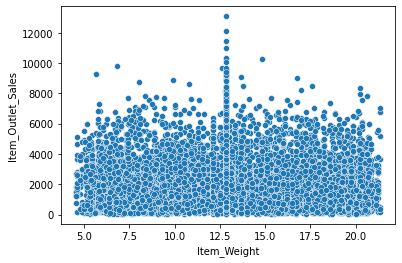

In [26]:
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", data=df)

In [ ]:
# The Plot tells that there is very less correlation of Item_Outlet_Sales and item_Weight
# from the heat map we can also see their correlation is 0.012

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

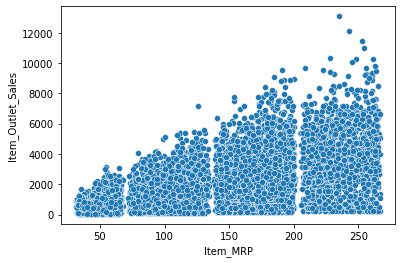

In [30]:
# There is a significant correlation between Sales and Item_MRP (seen from the heat map--->0.57)
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=df)

In [ ]:
# For higher MRP there are higher Outlet Sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

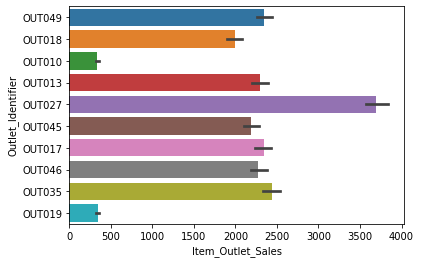

In [33]:
sns.barplot(y="Outlet_Identifier", x="Item_Outlet_Sales", data=df)

In [ ]:
# OUT027 has maximum outlet sales
# OUT019 and OUT010 have minimum outlet sales among all

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

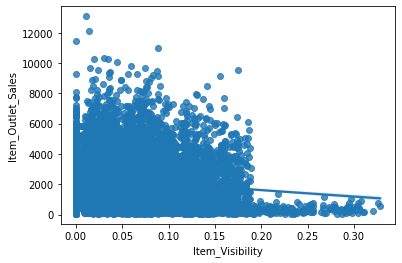

In [35]:
sns.regplot(x="Item_Visibility", y="Item_Outlet_Sales", data=df)

In [ ]:
# there were higher sales in the visibility range 0 to 0.2

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

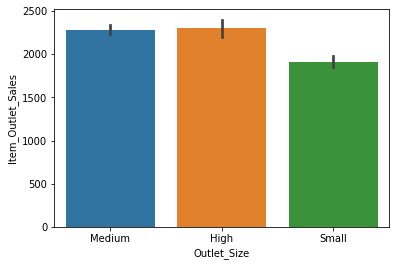

In [36]:
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=df)

In [ ]:
# maximum sales happened from the Outlets having medium and high size

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

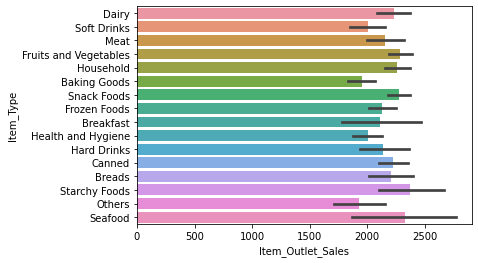

In [39]:
sns.barplot(y="Item_Type", x="Item_Outlet_Sales", data=df)

In [ ]:
# Items and their sales (mean or average)

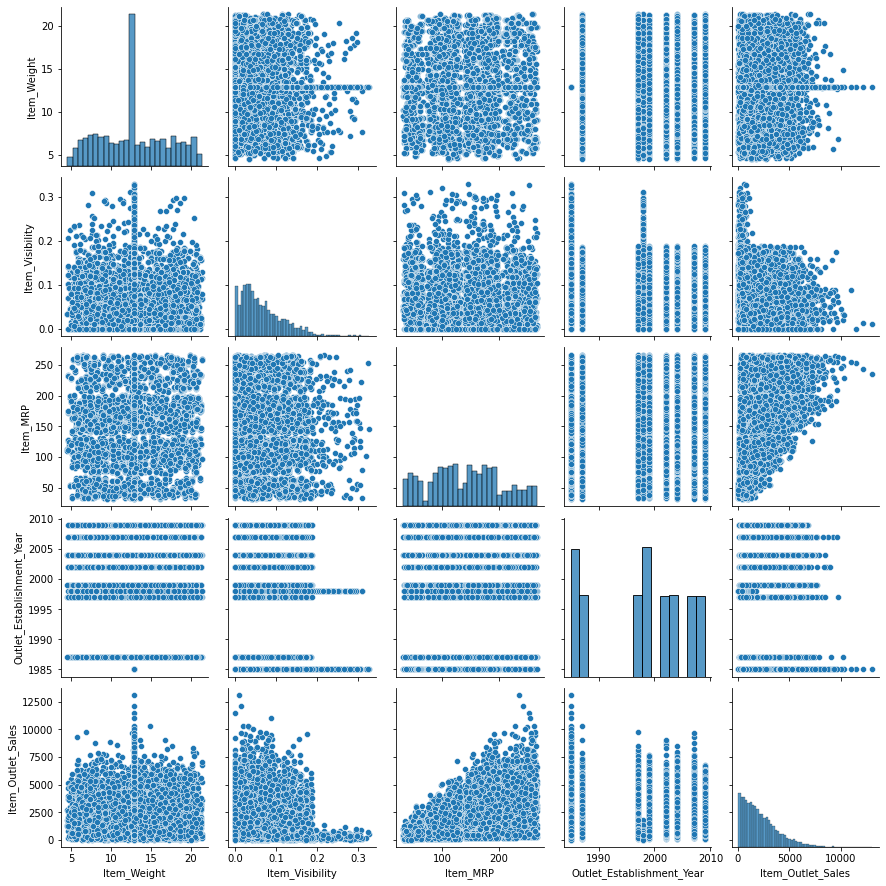

In [40]:
sns.pairplot(df)

In [ ]:
# This plot shows all the possible pair of relationship between all attributes